<a href="https://colab.research.google.com/github/SVGS-EVA4/Phase2/blob/master/S8-Image_Super-Resolution_and_Neural_Style_Transfer/SRGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Degrade Torch and TorchVision Version(which is compatible in deployment)**

In [1]:
!pip install torch==1.5.0 torchvision==0.6.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 603.7MB 28kB/s 
     |████████████████████████████████| 6.5MB 63.1MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


## **Mount the drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp '/content/drive/My Drive/E4P2/EV4P2/session2/dataset_padded.zip' '/content'

## **Clone the SRGAN Repository**

In [5]:
!git clone 'https://github.com/leftthomas/SRGAN'

Cloning into 'SRGAN'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1054 (delta 0), reused 2 (delta 0), pack-reused 1049
Receiving objects: 100% (1054/1054), 32.17 MiB | 16.93 MiB/s, done.
Resolving deltas: 100% (667/667), done.


# **Extract dataset from zip file**

In [7]:
from zipfile import ZipFile 
if 'dataset_padded' in os.listdir('/content'):
  print('Dataset already unzipped')
else:
  with ZipFile('/content/dataset_padded.zip', 'r') as zip_file: 
    print('Unzipping dataset')
    zip_file.extractall() 
    print('Done!')

Unzipping dataset
Done!


In [11]:
mkdir '/content/CombinedData'

## **Make the images available in one single folder**

In [14]:
import shutil, os
folders = ['Flying_Birds', 'Winged_Drones', 'Small_QuadCopters', 'Large_QuadCopters']
for i in folders:
  for file in os.listdir(f'/content/Dataset/{i}'):
    shutil.copy(f'/content/Dataset/{i}/{file}', '/content/CombinedData')


## **Take some Images For Validation**

Note : Don't take lot of Images.Cuda Out of Memory will occur. 20-20 images will be good enough

In [19]:
import shutil, os

for i, file in enumerate(os.listdir('/content/CombinedData')):
    if(i>20):
      break
    shutil.copy(f'/content/CombinedData/{file}', '/content/Val')

# **Remove images Smaller than Crop Size**

Crop Size = 64*64

In [116]:
from PIL import Image
z = 0
for i in os.listdir('/content/CombinedData'):
  img = Image.open(f'/content/CombinedData/{i}')
  if(img.size[0] < 64 or img.size[1] < 64):
    z+=1
    os.remove(f'/content/CombinedData/{i}')
print(f'totally {z} files removed')


totally 1 files removed


In [36]:
from PIL import Image
z = 0
for i in os.listdir('/content/Val'):
  img = Image.open(f'/content/Val/{i}')
  if(img.size[0] < 64 or img.size[1] < 64):
    z+=1
    os.remove(f'/content/Val/{i}')
print(f'totally {z} files removed')


totally 0 files removed


In [17]:
%cd /content/SRGAN/

/content/SRGAN


## **Train The model**

1. Crop size : 64
2. Upscaling factor : 4
3. Batch Size : 32

In [39]:
%%time
!python train.py --crop_size  64 --num_epochs 10

# generator parameters: 734219
# discriminator parameters: 5215425
[1/10] Loss_D: 0.9899 Loss_G: 0.0099 D(x): 0.1775 D(G(z)): 0.1632: 100% 667/667 [05:48<00:00,  1.91it/s]
[converting LR images to SR images] PSNR: 26.4095 dB SSIM: 0.8674: 100% 21/21 [00:02<00:00,  7.63it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.53it/s]
[2/10] Loss_D: 0.9998 Loss_G: 0.0052 D(x): 0.0727 D(G(z)): 0.0716: 100% 667/667 [05:28<00:00,  2.03it/s]
[converting LR images to SR images] PSNR: 25.0394 dB SSIM: 0.8662: 100% 21/21 [00:02<00:00,  7.63it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.60it/s]
[3/10] Loss_D: 1.0000 Loss_G: 0.0264 D(x): 0.0000 D(G(z)): 0.0000: 100% 667/667 [05:24<00:00,  2.05it/s]
[converting LR images to SR images] PSNR: 19.8597 dB SSIM: 0.7619: 100% 21/21 [00:02<00:00,  7.48it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.66it/s]
[4/10] Loss_D: 1.0000 Loss_G: 0.0072 D(x): 0.0000 D(G(z)): 0.0000: 100% 667/667 [05:24<00:00,  2.05it/s]
[converting LR images

In [41]:
#training for 10 more Epochs
%%time
!python train.py --crop_size  64 --num_epochs 20

# generator parameters: 734219
# discriminator parameters: 5215425
[10/20] Loss_D: 1.0003 Loss_G: 0.0038 D(x): 0.3525 D(G(z)): 0.3518: 100% 667/667 [05:53<00:00,  1.89it/s]
[converting LR images to SR images] PSNR: 25.6844 dB SSIM: 0.8727: 100% 21/21 [00:03<00:00,  6.58it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.50it/s]
[11/20] Loss_D: 1.0004 Loss_G: 0.0036 D(x): 0.3460 D(G(z)): 0.3457: 100% 667/667 [05:45<00:00,  1.93it/s]
[converting LR images to SR images] PSNR: 28.1518 dB SSIM: 0.8909: 100% 21/21 [00:03<00:00,  6.71it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.55it/s]
[12/20] Loss_D: 1.0005 Loss_G: 0.0034 D(x): 0.3244 D(G(z)): 0.3245: 100% 667/667 [05:44<00:00,  1.93it/s]
[converting LR images to SR images] PSNR: 27.7891 dB SSIM: 0.8901: 100% 21/21 [00:02<00:00,  7.15it/s]
[saving training results]: 100% 4/4 [00:02<00:00,  1.58it/s]
[13/20] Loss_D: 1.0013 Loss_G: 0.0034 D(x): 0.4207 D(G(z)): 0.4213: 100% 667/667 [05:42<00:00,  1.95it/s]
[converting LR im

## **Plot the Loss and SSIM index**

the values of loss and SSIM were not saved in the file. So took the values from the logs

In [42]:
Loss_D = [0.9899,0.9998,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0003,1.0004,1.0005,1.0013,1.0034,1.0025,1.0018,1.0021,1.0011,1.0012,1.0005]
Loss_G = [0.0099,0.0052,0.0264,0.0072,0.0046,0.0043,0.0041,0.0040,0.0040,0.0039,0.0038,0.0036,0.0034,0.0034,0.0032,0.0033,0.0034,0.0035,0.0033,0.0032,0.0032]
SSIM = [0.8674,0.8662,0.7619,0.8736,0.8765,0.8832,0.8856,0.8856,0.8884,0.8892,0.8727, 0.8909,0.8901,0.8880,0.8928,0.8882,0.8932,0.8917,0.8939,0.8936,0.8935]

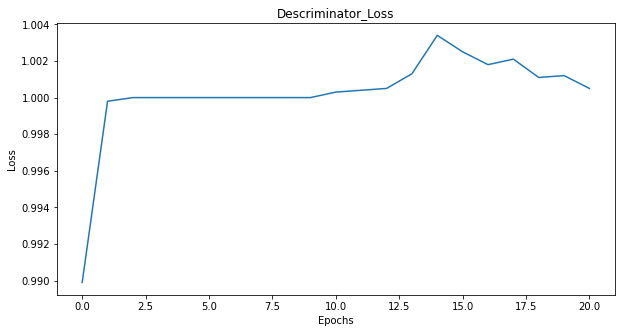

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Descriminator_Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.plot(Loss_D)


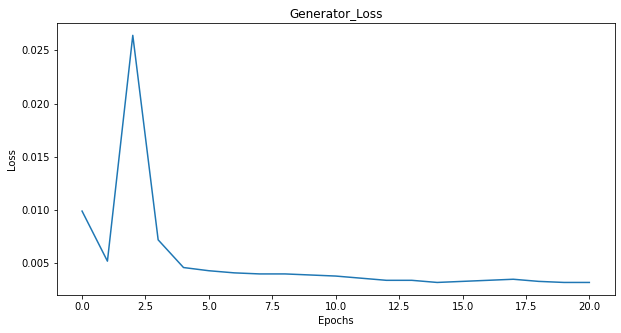

In [55]:
plt.figure(figsize=(10,5))
plt.title("Generator_Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.plot(Loss_G)

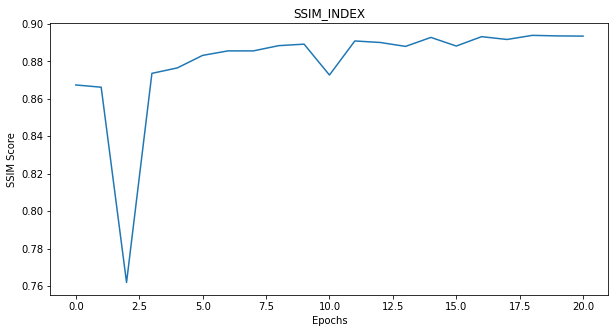

In [104]:
plt.figure(figsize=(10,5))
plt.title("SSIM_INDEX")
plt.xlabel("Epochs")
plt.ylabel('SSIM Score')
plt.plot(SSIM)

## **Test for Single Image**

In [65]:
!python test_image.py --image_name  "/content/Small_QuadCopters_1005.jpg" --model_name  'netG_epoch_4_20.pth' 
        

test_image.py:31: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(ToTensor()(image), volatile=True).unsqueeze(0)
cost0.010092999999999464s


In [115]:
LR = Image.open("/content/Small_QuadCopters_1005.jpg").size # input image
HR = Image.open("/content/Result/result.jpg").size # output image
print(f'LR Image Size ::{LR} HR Image Size {HR}')

LR Image Size ::(200, 200) HR Image Size (800, 800)


## **Results**

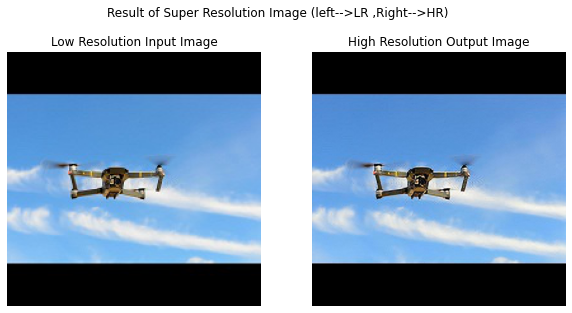

In [93]:

fig, axs = plt.subplots(1, 2,figsize = (10,5)) 

axs[0].imshow(Image.open("/content/Small_QuadCopters_1005.jpg"))
axs[0].set_title('Low Resolution Input Image') 
axs[0].axis('off')
axs[1].imshow(Image.open("/content/Result/result.jpg")) 
axs[1].set_title('High Resolution Output Image') 
axs[1].axis('off')
fig.suptitle('Result of Super Resolution Image (left-->LR ,Right-->HR)')

plt.show() 

## **Trace and Save the Model**

In [96]:
from model import Generator, Discriminator
netG = Generator(4)
netG.load_state_dict(torch.load("/content/SRGAN/epochs/netG_epoch_4_20.pth"))

<All keys matched successfully>

In [100]:
netG.to('cpu')
netG.eval()
print('done')

done


In [99]:
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import ToTensor, ToPILImage
image = Image.open("/content/Small_QuadCopters_1005.jpg")
image = Variable(ToTensor()(image), volatile=True).unsqueeze(0)
traced_model = torch.jit.trace(netG, image)
traced_model.save("/content/drive/My Drive/E4P2/SRGAN/Model/traced_srgan.pt")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """


In [57]:
!cp -r '/content/SRGAN/epochs' '/content/drive/My Drive/E4P2/SRGAN/Model'
!cp -r '/content/SRGAN/training_results/training_results' '/content/drive/My Drive/E4P2/SRGAN'